In [ ]:
! pip install min-dalle -q


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 21.7 MB/s eta 0:00:00


In [ ]:
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder


/usr/local/lib/python3.10/dist-packages/min_dalle/min_dalle.py:122: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(self.encoder_params_path)


downloading decoder params
initializing DalleBartDecoder


/usr/local/lib/python3.10/dist-packages/min_dalle/min_dalle.py:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(self.decoder_params_path)


downloading detokenizer params
initializing VQGanDetokenizer


/usr/local/lib/python3.10/dist-packages/min_dalle/min_dalle.py:151: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load(self.detoker_params_path)


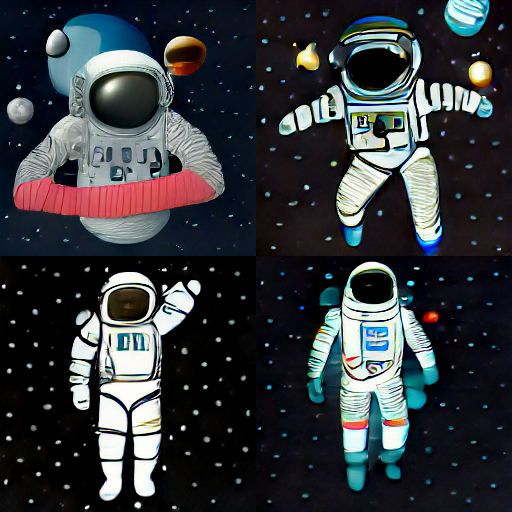

CPU times: user 29.1 s, sys: 163 ms, total: 29.3 s
Wall time: 29.4 s


In [ ]:
%%time

text = "ASTRONAUT IN SPACE"
seed = 6
grid_size = 2

display(model.generate_image(text, seed, grid_size))

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

In [ ]:
# Load BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
# Load and process the image
image = Image.open("/content/test.png")
inputs = processor(image, return_tensors="pt")

In [ ]:
# Generate the caption
output = model.generate(**inputs)
caption = processor.decode(output[0], skip_special_tokens=True)
print("BLIP Generated Caption:", caption)